# Modelos de Support Vector Machine para Pedigrí Forense.

Modelos de supoort vector machine (SVM) para resolver el problema de clasificación de registros en pedigrí forense, haciendo una comparativa entre modelos con parámetros por defecto y una búsqueda de los mejores parámetros mediante Grid Search en datos balanceados con relación de paternidad 

---

## Configuración de la sección

En esta sección se realiza lo siguiente:
- Importado de las librerías necesarias para trabajar en todo el *notebook*.
- Exploración de los datos.
- Separación de los datos en entrenamiento y pruebas.
- Selección de las variables X y Y para el entrenamiento del modelo.

In [5]:
# Imports
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Reading the CSV files with pandas

df_train = pd.read_csv("../../data/processed/definitive-three-classes/train.csv")
df_test = pd.read_csv("../../data/processed/definitive-three-classes/test.csv")

In [7]:
# Exploring the data

df_train.head()

,Shared_Markers,k0,k1,k2,Share_allele,Value,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel,ValueLog10,True_positive
0,15,0,11,4,19,100.000,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-1,1:749,100-999,83202,S,66302,F,2.000000,1.0
1,15,0,5,10,25,694.085,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100-999,30702,F,98602,S,2.841413,0.0
2,15,0,4,11,26,12041.600,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-375,375:375,10000-99999,133801,S,133801,F,4.080684,1.0
3,15,0,9,6,21,11098.100,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-175,175:575,10000-99999,28901,S,28901,F,4.045249,1.0
4,15,0,9,6,21,800.000,15,ScreenMatch,Simulados,Paternidad,15_ScreenMatch_Simulados_Paternidad_allele,Process_LIPI-175,175:575,100-999,132702,S,142701,F,2.903090,1.0


In [8]:
# Feature columns for the SVM model

feature_columns = ["Shared_Markers", "k0", "k1", "k2", "Share_allele", "ValueLog10"]

In [9]:
# Splitting data into training and testing sets

x_train = df_train[feature_columns]
y_train = df_train["True_positive"]
x_test = df_test[feature_columns]
y_test = df_test["True_positive"]

In [10]:
# Base SVM model 

svm_model = SVC()

---

## Máquina de soporte vectorial base con múltiples variables

Modelo de SVM entrenado con hiperparámetros por defecto e impresión de la matriz de confusión.

In [11]:
# Training and evaluation of the SVM model

svm_model.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
y_pred = svm_model.predict(x_test)

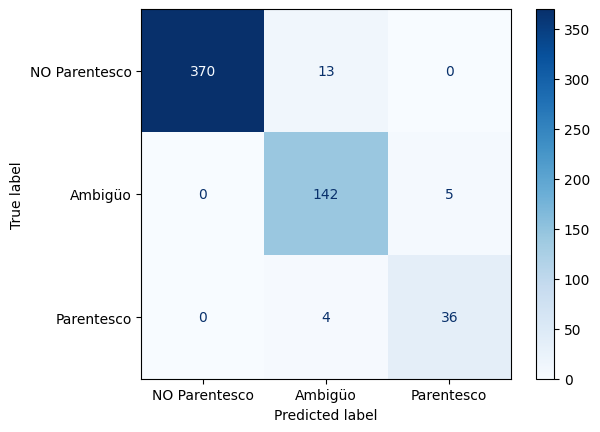

In [13]:
# Print the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [14]:
print("===== Metrics for SVM Model =====")
print(classification_report(y_test, y_pred, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for SVM Model =====
               precision    recall  f1-score   support

NO Parentesco       1.00      0.97      0.98       383
      Ambigüo       0.89      0.97      0.93       147
   Parentesco       0.88      0.90      0.89        40

     accuracy                           0.96       570
    macro avg       0.92      0.94      0.93       570
 weighted avg       0.96      0.96      0.96       570



---

In [15]:
# Feature columns for the SVM model

feature_columns = ["k1", "k2","ValueLog10"]

In [16]:
# Splitting data into training and testing sets

x_train = df_train[feature_columns]
y_train = df_train["True_positive"]
x_test = df_test[feature_columns]
y_test = df_test["True_positive"]

In [17]:
# Base SVM model 

svm_model = SVC()

In [18]:
# Training and evaluation of the SVM model

svm_model.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
y_pred = svm_model.predict(x_test)

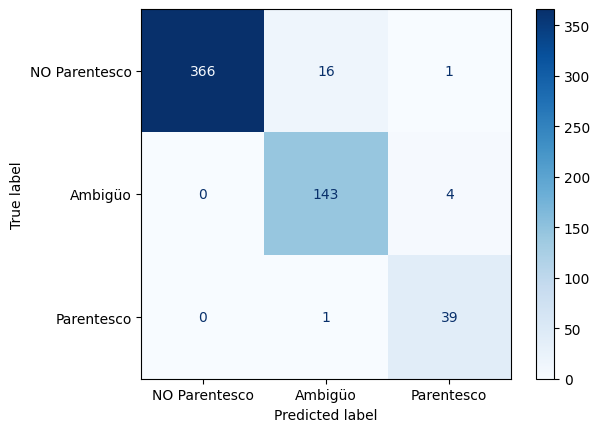

In [20]:
# Print the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['NO Parentesco', 'Ambigüo', 'Parentesco'])
cm_display.plot(cmap=plt.cm.Blues)

In [21]:
print("===== Metrics for SVM Model =====")
print(classification_report(y_test, y_pred, target_names=['NO Parentesco', 'Ambigüo', 'Parentesco']))

===== Metrics for SVM Model =====
               precision    recall  f1-score   support

NO Parentesco       1.00      0.96      0.98       383
      Ambigüo       0.89      0.97      0.93       147
   Parentesco       0.89      0.97      0.93        40

     accuracy                           0.96       570
    macro avg       0.93      0.97      0.95       570
 weighted avg       0.96      0.96      0.96       570

